Defining a city 


In [28]:
## Importing required packages
import pandas as pd 
import numpy as np 
import missingno as miss

In [29]:
##Loading data
raw_data = pd.read_csv("C:/Users/VIOLIN/Desktop/Final-Project_Harshini-/Data/worldcities.csv")
##Printing data
print(raw_data)

              city   city_ascii      lat       lng      country iso2 iso3  \
0            Tokyo        Tokyo  35.6897  139.6922        Japan   JP  JPN   
1          Jakarta      Jakarta  -6.2146  106.8451    Indonesia   ID  IDN   
2            Delhi        Delhi  28.6600   77.2300        India   IN  IND   
3           Mumbai       Mumbai  18.9667   72.8333        India   IN  IND   
4           Manila       Manila  14.5958  120.9772  Philippines   PH  PHL   
...            ...          ...      ...       ...          ...  ...  ...   
26563         Nord         Nord  81.7166  -17.8000    Greenland   GL  GRL   
26564  Timmiarmiut  Timmiarmiut  62.5333  -42.2167    Greenland   GL  GRL   
26565  Cheremoshna  Cheremoshna  51.3894   30.0989      Ukraine   UA  UKR   
26566    Ambarchik    Ambarchik  69.6510  162.3336       Russia   RU  RUS   
26567      Nordvik      Nordvik  74.0165  111.5100       Russia   RU  RUS   

               admin_name  capital  population          id  
0             

So the dataset contains a list of 26568 cities. 

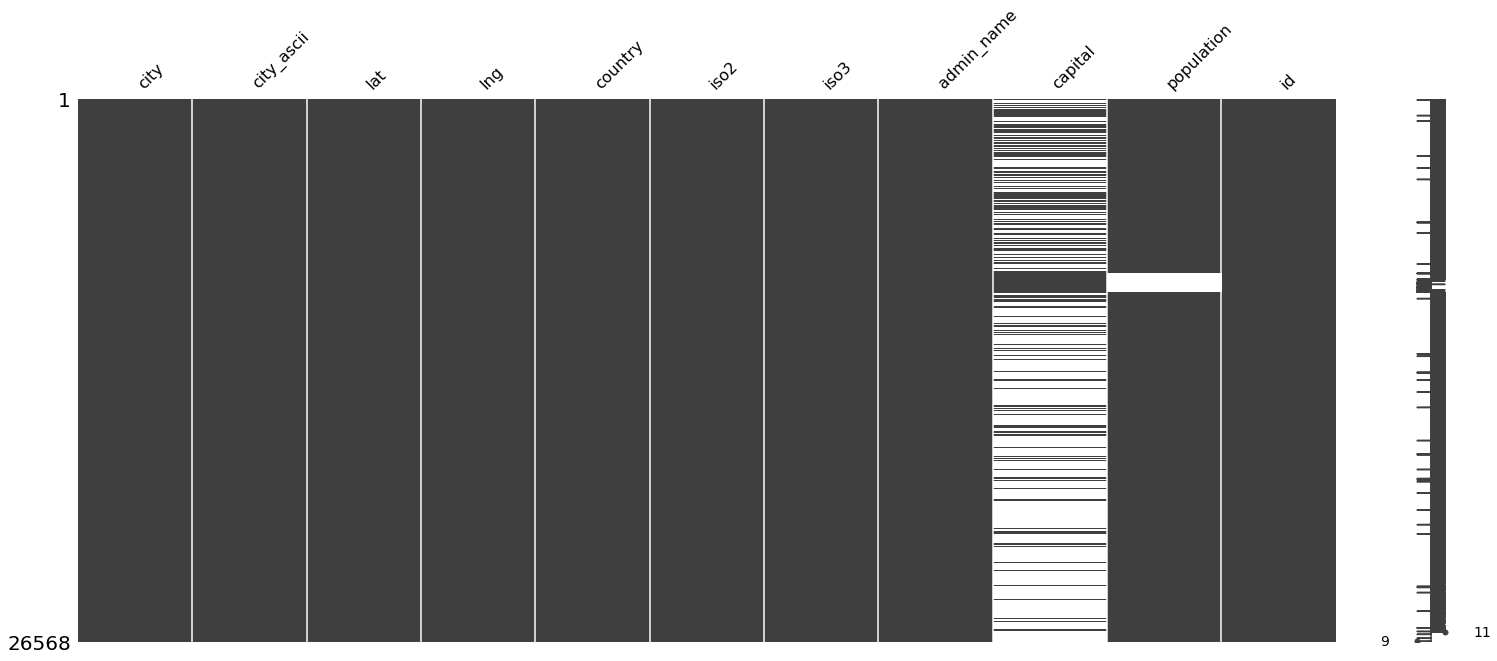

In [30]:
#Checked to see if that dataset was complete
miss.matrix(raw_data)

We can drop the columns city,latitude, longitude,iso2,iso3,admin_name and id as they don't serve any purpose in our case. 
I have decided to drop capital column as well, as substantial amount of data is missing. 

In [31]:
cities = raw_data[['city_ascii','country','population']]
print(cities)

        city_ascii      country  population
0            Tokyo        Japan  37977000.0
1          Jakarta    Indonesia  34540000.0
2            Delhi        India  29617000.0
3           Mumbai        India  23355000.0
4           Manila  Philippines  23088000.0
...            ...          ...         ...
26563         Nord    Greenland        10.0
26564  Timmiarmiut    Greenland        10.0
26565  Cheremoshna      Ukraine         0.0
26566    Ambarchik       Russia         0.0
26567      Nordvik       Russia         0.0

[26568 rows x 3 columns]


Dealing with missing values

In [32]:
cities.replace(to_replace = np.nan, value = -999)  

,city_ascii,country,population
0,Tokyo,Japan,37977000.0
1,Jakarta,Indonesia,34540000.0
2,Delhi,India,29617000.0
3,Mumbai,India,23355000.0
4,Manila,Philippines,23088000.0
...,...,...,...
26563,Nord,Greenland,10.0
26564,Timmiarmiut,Greenland,10.0
26565,Cheremoshna,Ukraine,0.0
26566,Ambarchik,Russia,0.0


The definition of a city just based on its Population is a bit tricky. in countries like Sweden even with 200 inhabitants a place is called city, whereas it is 50000 for Japan. Hence let us take United states parameter for identifying the cities/urbanized areas which is 2500 & urban centers - 50000.

Let us remove the rows with population less that 2500.

In [33]:
cities = cities[cities['population'] > 2500] 

print(cities)

          city_ascii      country  population
0              Tokyo        Japan  37977000.0
1            Jakarta    Indonesia  34540000.0
2              Delhi        India  29617000.0
3             Mumbai        India  23355000.0
4             Manila  Philippines  23088000.0
...              ...          ...         ...
26357  Villa Ygatimi     Paraguay      2809.0
26358     Entre Rios      Bolivia      2685.0
26359         Huasco        Chile      2558.0
26360    Provideniya       Russia      2536.0
26361     Chokurdakh       Russia      2506.0

[25194 rows x 3 columns]




## Checking no of cities per country

In [35]:
country_city = cities.groupby('country').city_ascii.count()

country_city = country_city.reset_index()
print(country_city) 

            country  city_ascii
0       Afghanistan          39
1           Albania          50
2           Algeria          56
3    American Samoa           1
4           Andorra           1
..              ...         ...
212       Venezuela          88
213         Vietnam          65
214           Yemen          38
215          Zambia          34
216        Zimbabwe          24

[217 rows x 2 columns]


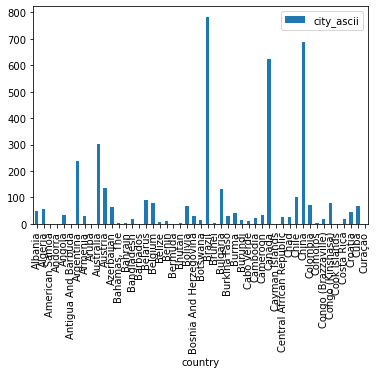

In [41]:
##Divided the data into subsets for better visualization
country_city_part1 = country_city[1:50]
ax = country_city_part1.plot.bar(y='city_ascii',x='country')

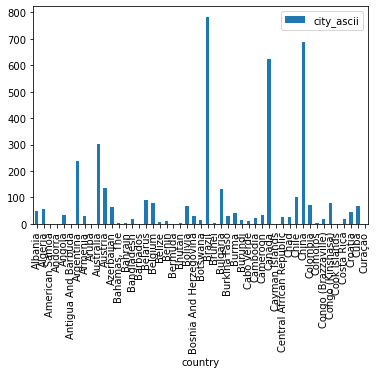

In [42]:
country_city_part2 = country_city[51:100]
ax = country_city_part1.plot.bar(y='city_ascii',x='country')

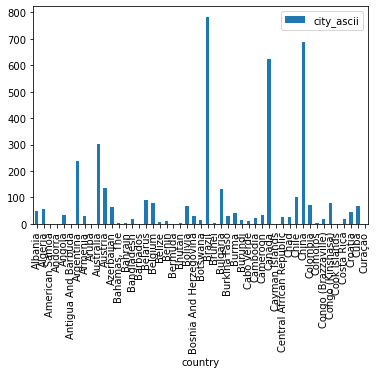

In [43]:
country_city_part3 = country_city[100:150]
ax = country_city_part1.plot.bar(y='city_ascii',x='country')

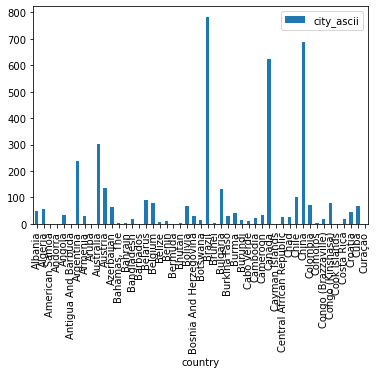

In [44]:
country_city_part4 = country_city[150:217]
ax = country_city_part1.plot.bar(y='city_ascii',x='country')

Now let us divide the cities data set into two regions Urban centers with population> 50000 and Urbanized areas with population b/w 2500-50000. 

In [ ]:
urban_centers = cities[cities['population'] > 50000]
print(urban_centers)


#### Checking country wise records for Urban centers

In [ ]:
country_urban_centers = urban_centers.groupby('country').city_ascii.count()
print(country_urban_centers)

## Hence Urban centers are present only in 188 of the list of 217 countries.

In [ ]:
urbanized_areas = cities[cities['population'] < 50000]
print(urbanized_areas)


In [ ]:
country_urbanized_areas = urbanized_areas.groupby('country').city_ascii.count()
print(country_urbanized_areas)

In [ ]:
##creating a output csv files
cities.to_csv("C:/Users/VIOLIN/Desktop/Final-Project_Harshini-/Data/Processed data/Total_cities.csv", sep=',',index=False)
country_city.to_csv("C:/Users/VIOLIN/Desktop/Final-Project_Harshini-/Data/Processed data/country_city.csv", sep=',',index=False)
urban_centers.to_csv("C:/Users/VIOLIN/Desktop/Final-Project_Harshini-/Data/Processed data/Urban_centers.csv", sep=',',index=False)
country_urban_centers.to_csv("C:/Users/VIOLIN/Desktop/Final-Project_Harshini-/Data/Processed data/country_No of Urban centers.csv", sep=',',index=False)
urbanized_areas.to_csv("C:/Users/VIOLIN/Desktop/Final-Project_Harshini-/Data/Processed data/Urbanized areas.csv", sep=',',index=False)
country_urbanized_areas.to_csv("C:/Users/VIOLIN/Desktop/Final-Project_Harshini-/Data/Processed data/Country_No of Urbanized areas.csv", sep=',',index=False)